# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Load Dataset

In [2]:
# Load the breast cancer dataset
df = pd.read_csv('input/breast-cancer.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nTarget Distribution:")
print(df['diagnosis'].value_counts())

Dataset Shape: (569, 32)

First few rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst

# Data Exploration and Visualization

In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

Missing values:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Statistical Summary:
                 id  

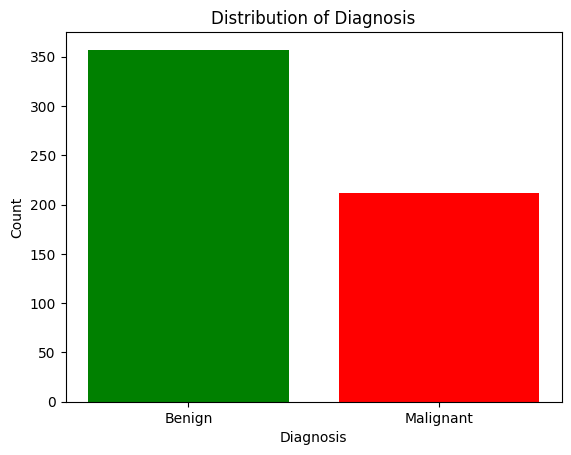

Benign: 357 (62.7%)
Malignant: 212 (37.3%)


In [4]:
# Visualize target distribution
diagnosis_counts = df['diagnosis'].value_counts()
plt.bar(['Benign', 'Malignant'], [diagnosis_counts['B'], diagnosis_counts['M']], color=['green', 'red'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')
plt.show()

print(f"Benign: {diagnosis_counts['B']} ({diagnosis_counts['B']/len(df)*100:.1f}%)")
print(f"Malignant: {diagnosis_counts['M']} ({diagnosis_counts['M']/len(df)*100:.1f}%)")

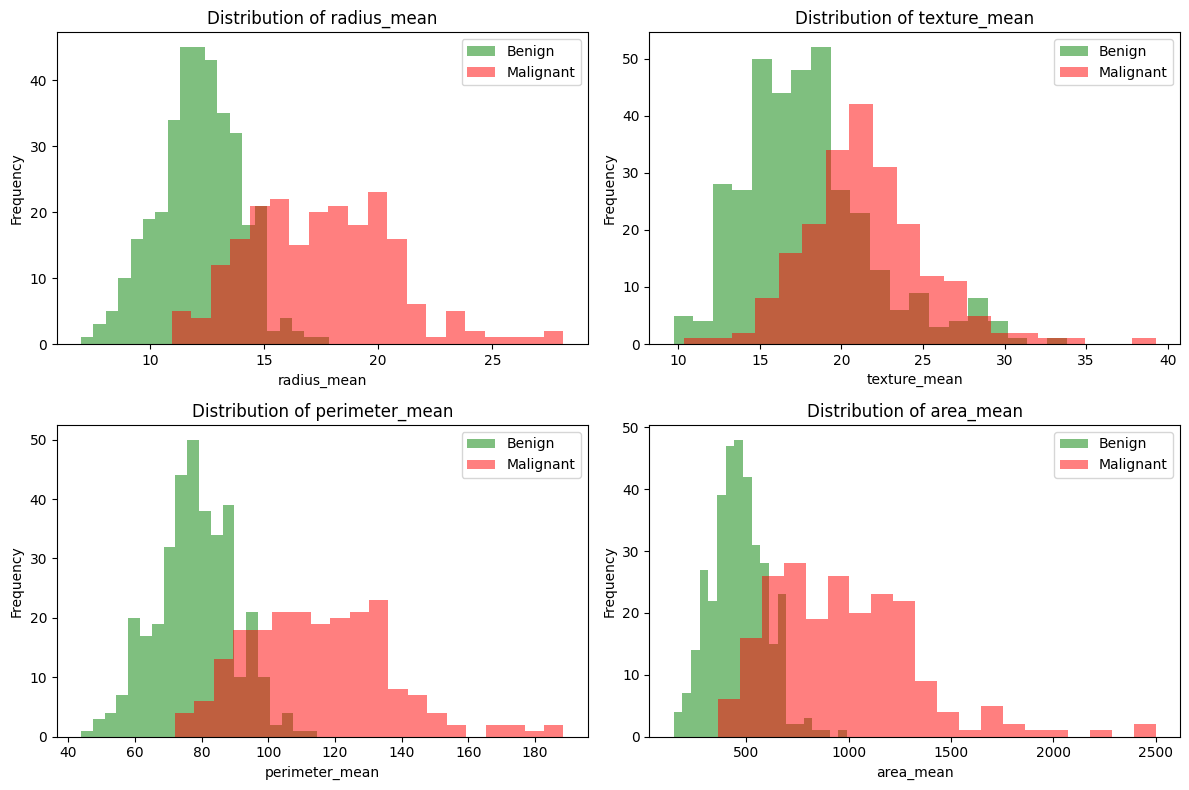

In [5]:
# Visualize some key features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

for i, feature in enumerate(features_to_plot):
    row = i // 2
    col = i % 2
    
    # Separate data by diagnosis
    benign = df[df['diagnosis'] == 'B'][feature]
    malignant = df[df['diagnosis'] == 'M'][feature]
    
    # Create histogram
    axes[row, col].hist(benign, bins=20, alpha=0.5, label='Benign', color='green')
    axes[row, col].hist(malignant, bins=20, alpha=0.5, label='Malignant', color='red')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

# Data Preprocessing

In [6]:
# Drop the 'id' column as it's not useful for prediction
df = df.drop('id', axis=1)

# Convert diagnosis to binary: M=1 (Malignant), B=0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (569, 30)
Target shape: (569,)

Feature columns:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (455, 30)
Testing set size: (114, 30)


In [8]:
# Standardize the features 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features standardized successfully!")

Features standardized successfully!


# Naive Bayes Implementation

In [9]:
# Train Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create and train the model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

print("Naive Bayes model trained successfully!")

Naive Bayes model trained successfully!


# Model Evaluation

In [10]:
# Make predictions
y_pred_train = nb_model.predict(X_train_scaled)
y_pred_test = nb_model.predict(X_test_scaled)

# Calculate accuracy
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 93.63%
Testing Accuracy: 96.49%


In [11]:
# Detailed classification report
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred_test, target_names=['Benign', 'Malignant']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
[[70  1]
 [ 3 40]]


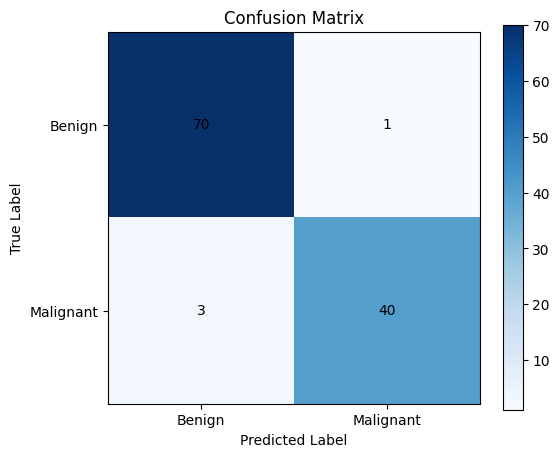

In [15]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Benign', 'Malignant']
plt.xticks([0, 1], classes)
plt.yticks([0, 1], classes)

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

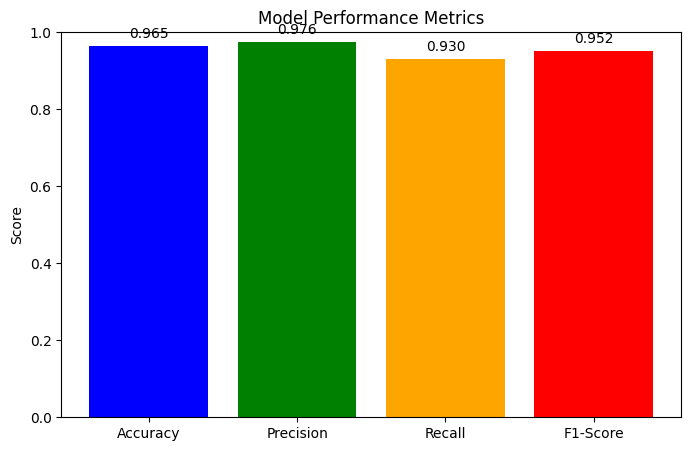

In [16]:
# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Visualize metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [test_accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.0)
plt.ylabel('Score')
plt.title('Model Performance Metrics')

# Add value labels on bars
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f'{value:.3f}', ha='center')

plt.show()